## Imports

In [554]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import joblib

## Lendo o df

In [555]:
df_original= pd.read_excel('C:/Users/henriquelucareli-ieg/Desktop/Recoope/Tudo/Analise Exploratoria/base_empresas_reciclagem_IA.xlsx')

display(df_original.head(5))

,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral
0,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,-0.635066,kilogramas,40.263.170/0008-50 - SOLVÍ ESSENCIS AMBIENTAL ...,Ativa
1,COMÉRCIO DE SUCATAS MALLON LTDA - ME,SANTA CATARINA,SAO BENTO DO SUL,2009,Resíduo de papel e papelão,Outros,-0.597463,kilogramas,97.469.506/0001-86 - COMERCIO E TRANSPORTES FE...,Ativa
2,COMÉRCIO DE SUCATAS MALLON LTDA - ME,SANTA CATARINA,SAO BENTO DO SUL,2009,Sucata de metais ferrosos,Outros,-0.575669,kilogramas,07.358.761/0033-46 - GERDAU AÇOS LONGOS S.A.,Ativa
3,GSM - CENTRO DE RECICLAGEM E GESTAO AMBIENTAL ...,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,-0.609894,kilogramas,01.300.758/0001-08 - BOING COMÉRCIO DE METAIS ...,Ativa
4,GSM - CENTRO DE RECICLAGEM E GESTAO AMBIENTAL ...,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,-0.560688,kilogramas,78.404.860/0001-88 - BRASILSAT HARALD SA,Ativa


## Separando o df entre pergunta e resposta

In [556]:
df_x = df_original.iloc[:, :-1]
df_x_ntransformar=df_original.iloc[:, :-1]

df_y = df_original.iloc[:, -1]

display(df_x)
display(df_y)

,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo
0,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,-0.635066,kilogramas,40.263.170/0008-50 - SOLVÍ ESSENCIS AMBIENTAL ...
1,COMÉRCIO DE SUCATAS MALLON LTDA - ME,SANTA CATARINA,SAO BENTO DO SUL,2009,Resíduo de papel e papelão,Outros,-0.597463,kilogramas,97.469.506/0001-86 - COMERCIO E TRANSPORTES FE...
2,COMÉRCIO DE SUCATAS MALLON LTDA - ME,SANTA CATARINA,SAO BENTO DO SUL,2009,Sucata de metais ferrosos,Outros,-0.575669,kilogramas,07.358.761/0033-46 - GERDAU AÇOS LONGOS S.A.
3,GSM - CENTRO DE RECICLAGEM E GESTAO AMBIENTAL ...,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,-0.609894,kilogramas,01.300.758/0001-08 - BOING COMÉRCIO DE METAIS ...
4,GSM - CENTRO DE RECICLAGEM E GESTAO AMBIENTAL ...,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,-0.560688,kilogramas,78.404.860/0001-88 - BRASILSAT HARALD SA
...,...,...,...,...,...,...,...,...,...
9833,Votorantim Cimentos Brasil S.A,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados de caminhão,Queima em formos industriais,-0.553633,kilogramas,88.768.080/0001-70 - MUNICIPIO DE SÃO GABRIEL/RS
9834,Votorantim Cimentos Brasil S.A,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados de caminhão,Queima em formos industriais,-0.435330,kilogramas,02.669.815/0001-93 - T.M. DE GODOY SOUZA BORRA...
9835,Votorantim Cimentos Brasil S.A,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados outras aplicações,Queima em formos industriais,-0.594099,kilogramas,88.768.080/0001-70 - MUNICIPIO DE SÃO GABRIEL/RS
9836,Votorantim Cimentos Brasil S.A,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados outras aplicações,Queima em formos industriais,-0.503062,kilogramas,02.669.815/0001-93 - T.M. DE GODOY SOUZA BORRA...


0           Ativa
1           Ativa
2           Ativa
3           Ativa
4           Ativa
          ...    
9833    Encerrado
9834    Encerrado
9835    Encerrado
9836    Encerrado
9837    Encerrado
Name: Situação Cadastral, Length: 9838, dtype: object

## Transformando os valores categoricos em números

In [557]:
label_encoder=LabelEncoder()

preprocessador = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), make_column_selector(dtype_include='object')),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [558]:
resposta_pre= label_encoder.fit_transform(df_y)

atributo_pre= pd.DataFrame(preprocessador.fit_transform(df_x),columns=preprocessador.get_feature_names_out())
atributo_pre=atributo_pre[df_x.columns]

display(resposta_pre)
display(atributo_pre.head())

array([0, 0, 0, ..., 1, 1, 1])

,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo
0,181.0,11.0,87.0,2004.0,57.0,6.0,-0.635066,0.0,1754.0
1,94.0,10.0,186.0,2009.0,51.0,4.0,-0.597463,0.0,2842.0
2,94.0,10.0,186.0,2009.0,75.0,4.0,-0.575669,0.0,1029.0
3,173.0,6.0,195.0,2000.0,76.0,4.0,-0.609894,0.0,170.0
4,173.0,6.0,195.0,2000.0,76.0,4.0,-0.560688,0.0,2610.0


## Separando treino e teste

In [559]:
#test_size= porcentagem de separação 25% teste
#random_state= Ela garante que a divisão e a proporção de classes nas respostas, se você estiver fazendo uma classificação binária e tiver 30% de respostas positivas, a divisão garantirá que os conjuntos de treino e teste também tenham essa proporção
X_train, X_test, y_train, y_test = train_test_split(atributo_pre, resposta_pre, test_size=0.25, random_state=0)

print("Conjunto de Treino:")
display(X_train)
display(y_train)

print("\nConjunto de Teste:")
display(X_test)
display(y_test)

Conjunto de Treino:


,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo
4103,338.0,8.0,129.0,2008.0,29.0,4.0,2.114252,0.0,2678.0
983,233.0,11.0,200.0,2008.0,42.0,4.0,-0.625115,0.0,90.0
3697,338.0,8.0,129.0,2007.0,60.0,4.0,1.030912,0.0,1690.0
1185,290.0,3.0,203.0,2007.0,75.0,4.0,-0.560279,0.0,10.0
5541,338.0,8.0,129.0,2009.0,51.0,6.0,-0.476707,0.0,511.0
...,...,...,...,...,...,...,...,...,...
7891,177.0,8.0,52.0,2003.0,69.0,6.0,-0.550401,0.0,153.0
9225,98.0,5.0,220.0,2007.0,51.0,4.0,1.692514,0.0,2588.0
4859,338.0,8.0,129.0,2008.0,69.0,4.0,-0.632289,0.0,2076.0
3264,263.0,8.0,128.0,2002.0,51.0,4.0,0.206872,0.0,1539.0


array([0, 1, 0, ..., 0, 0, 1])


Conjunto de Teste:


,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo
4869,338.0,8.0,129.0,2008.0,69.0,4.0,-0.416577,0.0,592.0
6839,72.0,11.0,187.0,2008.0,42.0,6.0,-0.503062,0.0,1130.0
9837,385.0,9.0,166.0,2008.0,42.0,6.0,-0.184432,0.0,2727.0
7867,177.0,8.0,52.0,2003.0,67.0,6.0,-0.627901,0.0,2142.0
9786,65.0,9.0,60.0,2009.0,75.0,4.0,-0.464781,0.0,2784.0
...,...,...,...,...,...,...,...,...,...
8261,177.0,8.0,52.0,2006.0,9.0,6.0,-0.530464,0.0,2032.0
8048,177.0,8.0,52.0,2004.0,69.0,6.0,0.862493,0.0,1923.0
5095,338.0,8.0,129.0,2009.0,0.0,4.0,-0.594099,0.0,577.0
7780,177.0,8.0,52.0,2003.0,35.0,6.0,3.447944,0.0,2222.0


array([0, 0, 1, ..., 0, 1, 1])

## Smote

In [560]:
smote= SMOTE()

atributos_balanceado, resposta_balanceado= smote.fit_resample(X_train,y_train)

In [561]:
#test_size= porcentagem de separação 25% teste
#random_state= Ela garante que a divisão e a proporção de classes nas respostas, se você estiver fazendo uma classificação binária e tiver 30% de respostas positivas, a divisão garantirá que os conjuntos de treino e teste também tenham essa proporção
X_train_smote, X_test_somte, y_train_smote, y_test_somte = train_test_split(atributos_balanceado, resposta_balanceado, test_size=0.25, random_state=0)

print("Conjunto de Treino:")
display(X_train_smote)
display(y_train_smote)

print("\nConjunto de Teste:")
display(X_test_somte)
display(y_test_somte)

Conjunto de Treino:


,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo
9878,144.934397,10.829318,27.479244,2011.056894,72.496663,4.113788,-0.613475,0.0,1042.308562
394,338.000000,8.000000,129.000000,2008.000000,30.000000,6.000000,0.611686,0.0,2327.000000
3750,338.000000,8.000000,129.000000,2009.000000,59.000000,5.000000,-0.632790,0.0,629.000000
975,334.000000,11.000000,200.000000,2007.000000,63.000000,4.000000,-0.622912,0.0,2363.000000
10456,78.000000,1.000000,96.000000,2002.794645,76.000000,4.000000,-0.322871,0.0,147.000000
...,...,...,...,...,...,...,...,...,...
4859,59.000000,10.000000,83.000000,2010.000000,78.000000,4.000000,-0.627610,0.0,2806.000000
3264,339.000000,10.000000,33.000000,2013.000000,51.000000,4.000000,-0.373107,0.0,2547.000000
9845,375.000000,5.000000,220.000000,2010.574617,51.000000,4.000000,-0.160023,0.0,2014.000000
10799,177.000000,8.000000,52.000000,2008.000000,69.574722,6.000000,-0.177007,0.0,1557.000000


array([1, 0, 0, ..., 1, 1, 1])


Conjunto de Teste:


,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo
4678,338.0,8.0,129.0,2008.000000,55.000000,4.0,-0.586247,0.0,432.000000
2446,338.0,8.0,129.0,2009.000000,24.000000,6.0,-0.635052,0.0,2270.000000
8302,177.0,8.0,52.0,2006.170795,69.000000,6.0,-0.360799,0.0,1567.170795
4534,48.0,8.0,128.0,2012.000000,51.000000,4.0,-0.631456,0.0,607.000000
519,338.0,8.0,129.0,2007.000000,70.000000,5.0,-0.339195,0.0,700.000000
...,...,...,...,...,...,...,...,...,...
9002,177.0,8.0,52.0,2008.435174,35.000000,6.0,0.394360,0.0,1334.608794
4579,177.0,8.0,52.0,2007.000000,60.000000,6.0,-0.602843,0.0,2039.000000
3749,86.0,5.0,141.0,2010.000000,63.000000,4.0,-0.548580,0.0,1429.000000
10075,177.0,8.0,52.0,2004.104916,24.577037,6.0,-0.166439,0.0,1550.842626


array([0, 0, 1, ..., 0, 1, 1])

### Grafico para comparar se utilisarei o smote ou não

In [562]:
modelo_sem_smote = tree.DecisionTreeClassifier(random_state=42)
modelo_sem_smote.fit(X_train, y_train)
y_pred_sem_smote = modelo_sem_smote.predict(X_test)

# 4. Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)

# 5. Treinar um modelo com SMOTE
modelo_com_smote = tree.DecisionTreeClassifier(random_state=42)
modelo_com_smote.fit(X_train_smote, y_train_smote)
y_pred_com_smote = modelo_com_smote.predict(X_test)

resultados = {
    "Modelo": ["Sem SMOTE", "Com SMOTE"],
    "Acurácia": [accuracy_score(y_test, y_pred_sem_smote), accuracy_score(y_test, y_pred_com_smote)],
    "F1-Score": [f1_score(y_test, y_pred_sem_smote), f1_score(y_test, y_pred_com_smote)]
}

df_resultados = pd.DataFrame(resultados)

# 7. Criar o gráfico comparativo usando Plotly Express
fig = px.bar(df_resultados, x="Modelo", y=["Acurácia", "F1-Score"], barmode="group", 
             title="Comparação do Desempenho com e sem SMOTE",
             labels={"value": "Score", "variable": "Métrica"},
             template="plotly_dark")

# Exibir o gráfico
fig.show()

## PCA Reduzindo a dimencionalidade

In [563]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
X_pca = pca.fit_transform(X_scaled)

print(f"Variância explicada por cada componente principal: {pca.explained_variance_ratio_}")
print(f"Componentes principais:\n{X_pca}")

Variância explicada por cada componente principal: [0.18464366 0.15605903]
Componentes principais:
[[-0.16701631 -0.22966899]
 [-0.28748178  1.30023965]
 [-0.5445628   0.30782898]
 ...
 [-0.72730799  0.26124934]
 [ 0.71342657  0.02286946]
 [-0.14003283  1.12862409]]


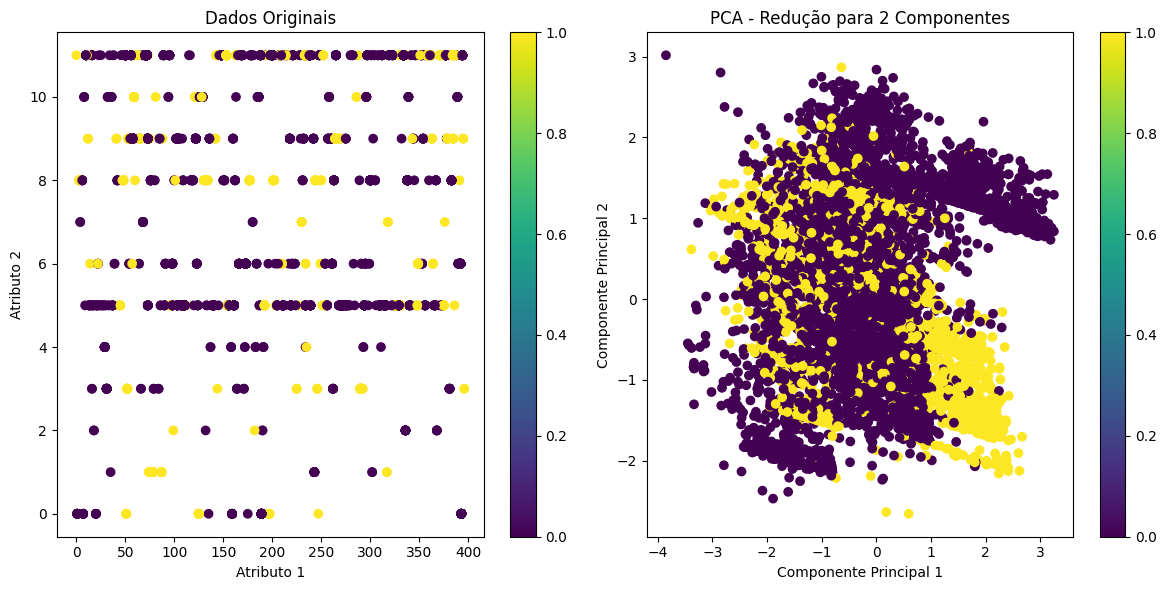

In [564]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.title('Dados Originais')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Redução para 2 Componentes')
plt.colorbar()

plt.tight_layout()
plt.show()

## Naivebays

In [565]:
def naivebays(X_train,y_train):
    # Creating a Gaussian Naive Bayes classifier
    classificador_bayes = GaussianNB()

    classificador_bayes.fit(X_train, y_train)

    # Utilizando o classificador para realizar a classificação 
    classificacao=classificador_bayes.predict(X_test)

    y_pred_bayes = classificador_bayes.predict(X_test)

    taxa_de_acerto = accuracy_score(y_test, y_pred_bayes)

    return classificador_bayes,classificacao,taxa_de_acerto

### Precision é o que nos buscamos, já que queremos que entre todos os casos a maquina consiga acertar a maioria (Saber se a maquina esta prevendo bem)

In [566]:
#                  IA
#             |    N      |      S
#Resposta N   |    1      |      0
#         S   |    2      |      2
        
#                  IA
#             |           N                 |           S
#Resposta N   |    Verdadeiro Negativo      |      Falso Positivo
#         S   |    Falso Negativo           |      Verdadeiro Positivo

### Verificar se o pca interfere ou não

In [567]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Function to initialize and train Naive Bayes model
def naivebays2(X_train, y_train):
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model

# Train and evaluate the model on original data
classificador_bayes = naivebays2(X_train, y_train)
classificacao = classificador_bayes.predict(X_test)
taxa_acerto = accuracy_score(y_test, classificacao)

# Apply PCA
pca = PCA(n_components=2)  # Ensure the number of components matches the model's expectation
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate the model on PCA-transformed data
classificador_bayes_pca = naivebays2(X_train_pca, y_train)
classificacao_pca = classificador_bayes_pca.predict(X_test_pca)
taxa_acerto_pca = accuracy_score(y_test, classificacao_pca)

print('Taxa de acertos:', taxa_acerto)
print('Taxa de acertos com PCA:', taxa_acerto_pca)

Taxa de acertos: 0.8321138211382114
Taxa de acertos com PCA: 0.7426829268292683


Taxa de acertos: 0.8321138211382114
Matriz de confusão:
[[1732   95]
 [ 318  315]]


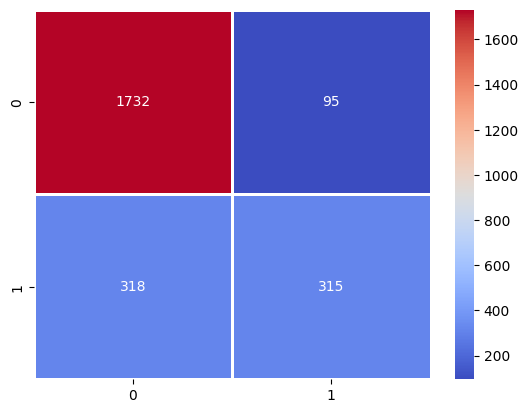

In [568]:
classificador_bayes,classificacao,taxa_acerto=naivebays(X_train,y_train)

y_pred_bayes = classificador_bayes.predict(X_test)

print('Taxa de acertos:', taxa_acerto)

matriz_de_confusao = confusion_matrix(y_test, y_pred_bayes)
print('Matriz de confusão:')
print(matriz_de_confusao)

sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### Precision é o que nos buscamos, já que queremos que entre todos os casos a maquina consiga acertar a maioria (Saber se a maquina esta prevendo bem)

In [569]:
# Avaliando a precisão - teste vs previsão
taxa_acerto=accuracy_score(y_test,classificacao)
print("Taxa de acerto: ",taxa_acerto)

rotulos_distintos = list(df_original["Situação Cadastral"].unique())
relatorio = classification_report(y_test, classificacao, target_names= rotulos_distintos)
print(relatorio)

Taxa de acerto:  0.8321138211382114
              precision    recall  f1-score   support

       Ativa       0.84      0.95      0.89      1827
   Encerrado       0.77      0.50      0.60       633

    accuracy                           0.83      2460
   macro avg       0.81      0.72      0.75      2460
weighted avg       0.83      0.83      0.82      2460



c:\Users\henriquelucareli-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

c:\Users\henriquelucareli-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

c:\Users\henriquelucareli-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

c:\Users\henriquelu

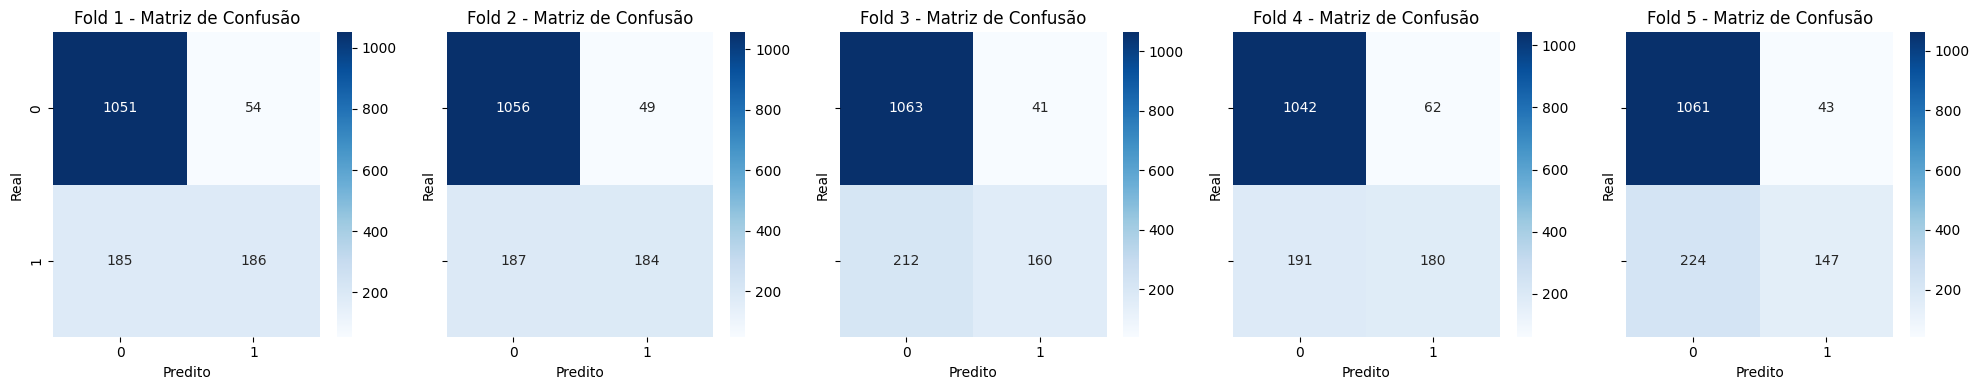

Acurácia do Fold 1: 0.83808
Acurácia do Fold 2: 0.84011
Acurácia do Fold 3: 0.82859
Acurácia do Fold 4: 0.82847
Acurácia do Fold 5: 0.81898


In [570]:
X, y = X_train, y_train

# Criar modelo
model = LogisticRegression(solver='liblinear', multi_class='ovr')

# Configurar Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5)

# Obter predições para cada fold
y_pred = cross_val_predict(model, X, y, cv=skf)

# Calcular matrizes de confusão
conf_matrices = [confusion_matrix(y[test_index], y_pred[test_index])
                 for train_index, test_index in skf.split(X, y)]

# Plotar as matrizes de confusão para cada fold
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey='row')
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", ax=axes[i], cmap="Blues")
    axes[i].set_title(f'Fold {i+1} - Matriz de Confusão')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')
    

plt.tight_layout()
plt.show()
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Acurácia para o fold atual
    fold_accuracy = accuracy_score(y[test_index], y_pred[test_index])
    print(f'Acurácia do Fold {i+1}: {fold_accuracy:.5f}')

## Árvore

In [571]:
def arvore(X_train,y_train):
    classificador_gini= tree.DecisionTreeClassifier(criterion='gini')
    classificador_entropy= tree.DecisionTreeClassifier(criterion='entropy')

    classificador_gini.fit(X_train,y_train)
    classificador_entropy.fit(X_train,y_train)

    return classificador_gini,classificador_entropy

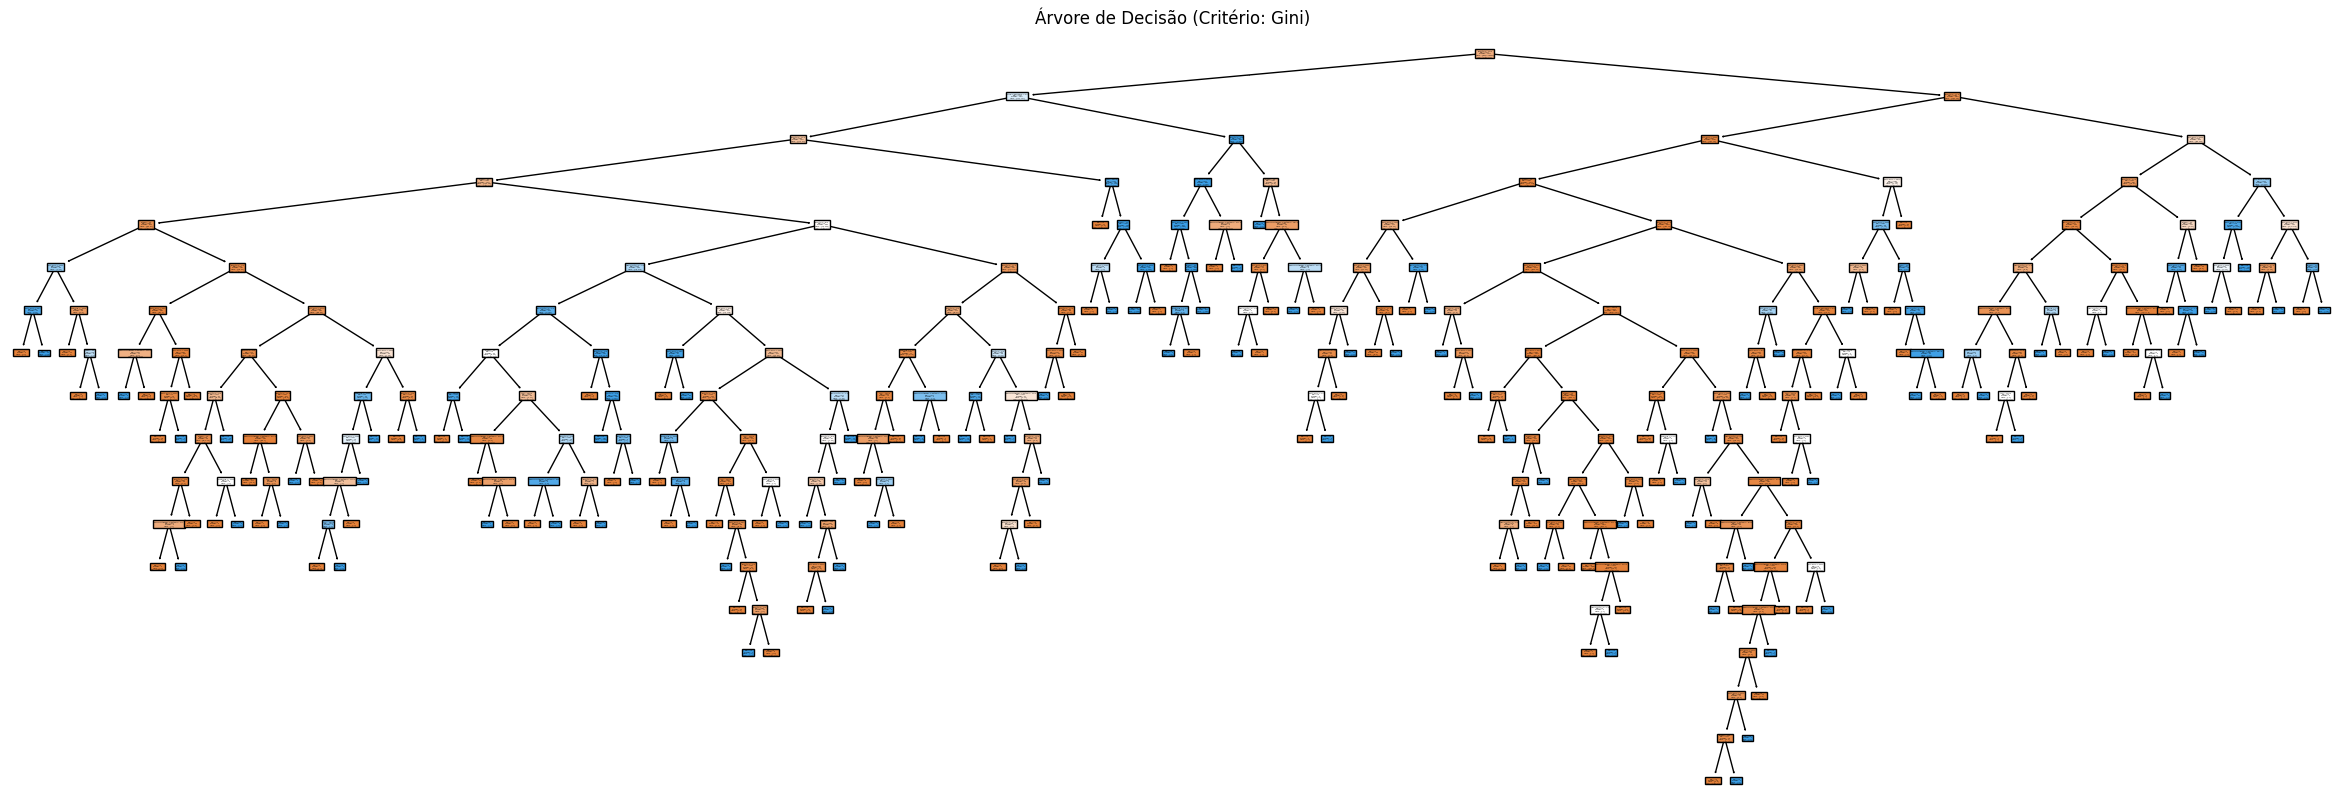

In [572]:
classificador_gini,classificador_entropy=arvore(X_train,y_train)
plt.figure(figsize=(30, 10))
tree.plot_tree(classificador_gini, feature_names=df_x_ntransformar.columns, class_names=df_x_ntransformar.columns, filled=True)
plt.title("Árvore de Decisão (Critério: Gini)")
plt.show()

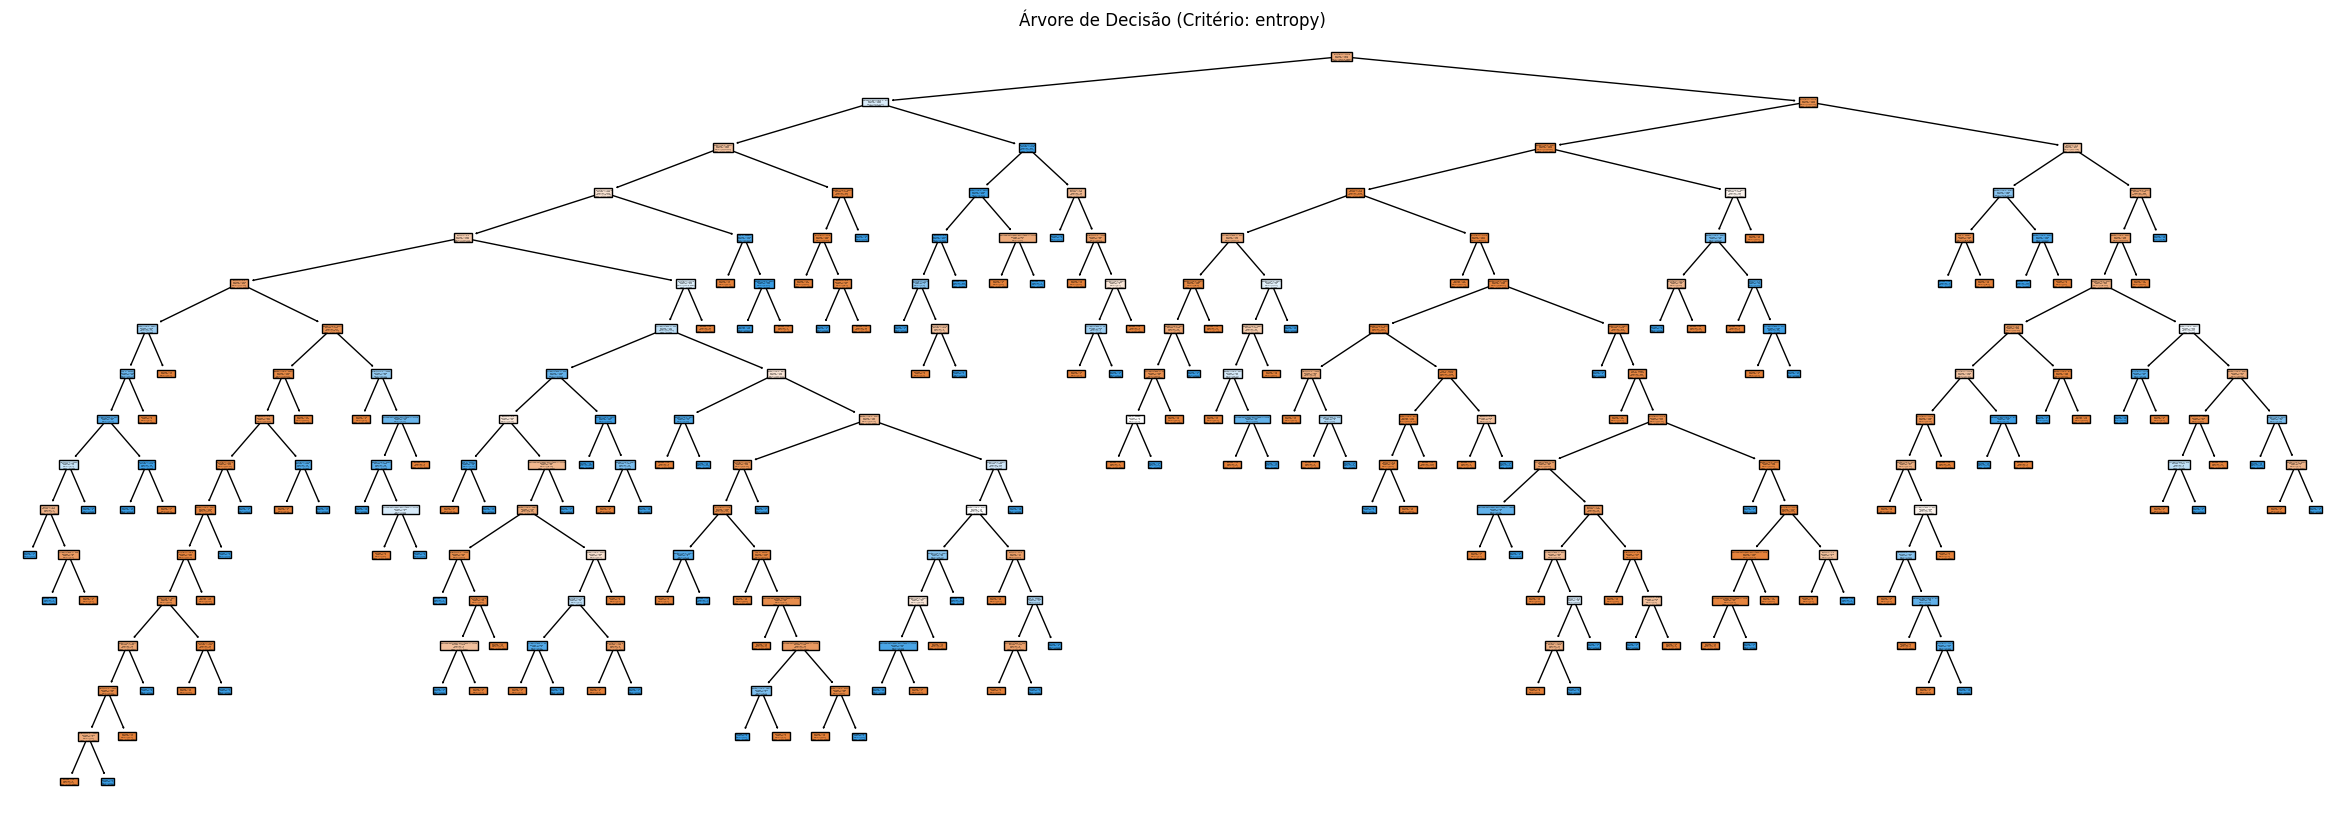

In [573]:
plt.figure(figsize=(30, 10))
tree.plot_tree(classificador_entropy, feature_names=df_x_ntransformar.columns, class_names=df_x_ntransformar.columns, filled=True)
plt.title("Árvore de Decisão (Critério: entropy)")
plt.show()

Taxa de acertos: 0.9833333333333333
Matriz de confusão:
[[1808   19]
 [  22  611]]


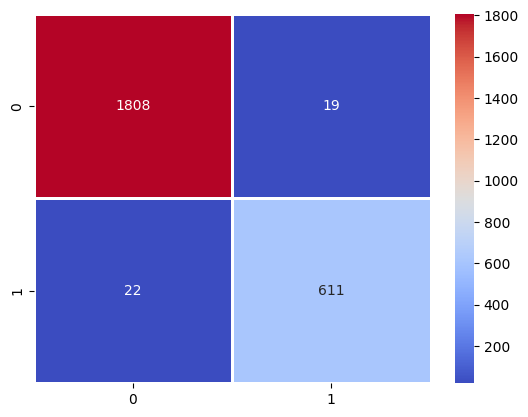

In [574]:
y_pred_gini = classificador_gini.predict(X_test)

taxa_de_acerto = accuracy_score(y_test, y_pred_gini)
print('Taxa de acertos:', taxa_de_acerto)

matriz_de_confusao = confusion_matrix(y_test, y_pred_gini)
print('Matriz de confusão:')
print(matriz_de_confusao)

sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Taxa de acertos: 0.9865853658536585
Matriz de confusão:
[[1811   16]
 [  17  616]]


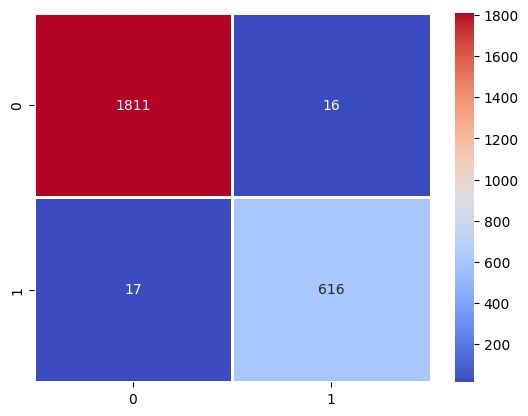

In [575]:
y_pred_entropy = classificador_entropy.predict(X_test)

taxa_de_acerto = accuracy_score(y_test, y_pred_entropy)
print('Taxa de acertos:', taxa_de_acerto)

matriz_de_confusao = confusion_matrix(y_test, y_pred_entropy)
print('Matriz de confusão:')
print(matriz_de_confusao)

sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

In [576]:
rotulos_distintos = list(df_original['Situação Cadastral'].unique())

relatorio = classification_report(y_test, y_pred_gini, target_names= rotulos_distintos)
print(relatorio)

              precision    recall  f1-score   support

       Ativa       0.99      0.99      0.99      1827
   Encerrado       0.97      0.97      0.97       633

    accuracy                           0.98      2460
   macro avg       0.98      0.98      0.98      2460
weighted avg       0.98      0.98      0.98      2460



In [577]:
relatorio = classification_report(y_test, y_pred_entropy, target_names= rotulos_distintos)
print(relatorio)

              precision    recall  f1-score   support

       Ativa       0.99      0.99      0.99      1827
   Encerrado       0.97      0.97      0.97       633

    accuracy                           0.99      2460
   macro avg       0.98      0.98      0.98      2460
weighted avg       0.99      0.99      0.99      2460



In [578]:
parametros={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,2,4,6,8,10,12],
    'min_samples_leaf':[1,2,5,10],
    'min_samples_split':[2,5,10],
    'max_features':[None,'sqrt','log2']
}

# ccp_alpha= mostrar a melhor arvore
classificador_tree= tree.DecisionTreeClassifier()

grid=GridSearchCV(estimator=classificador_tree,param_grid=parametros,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

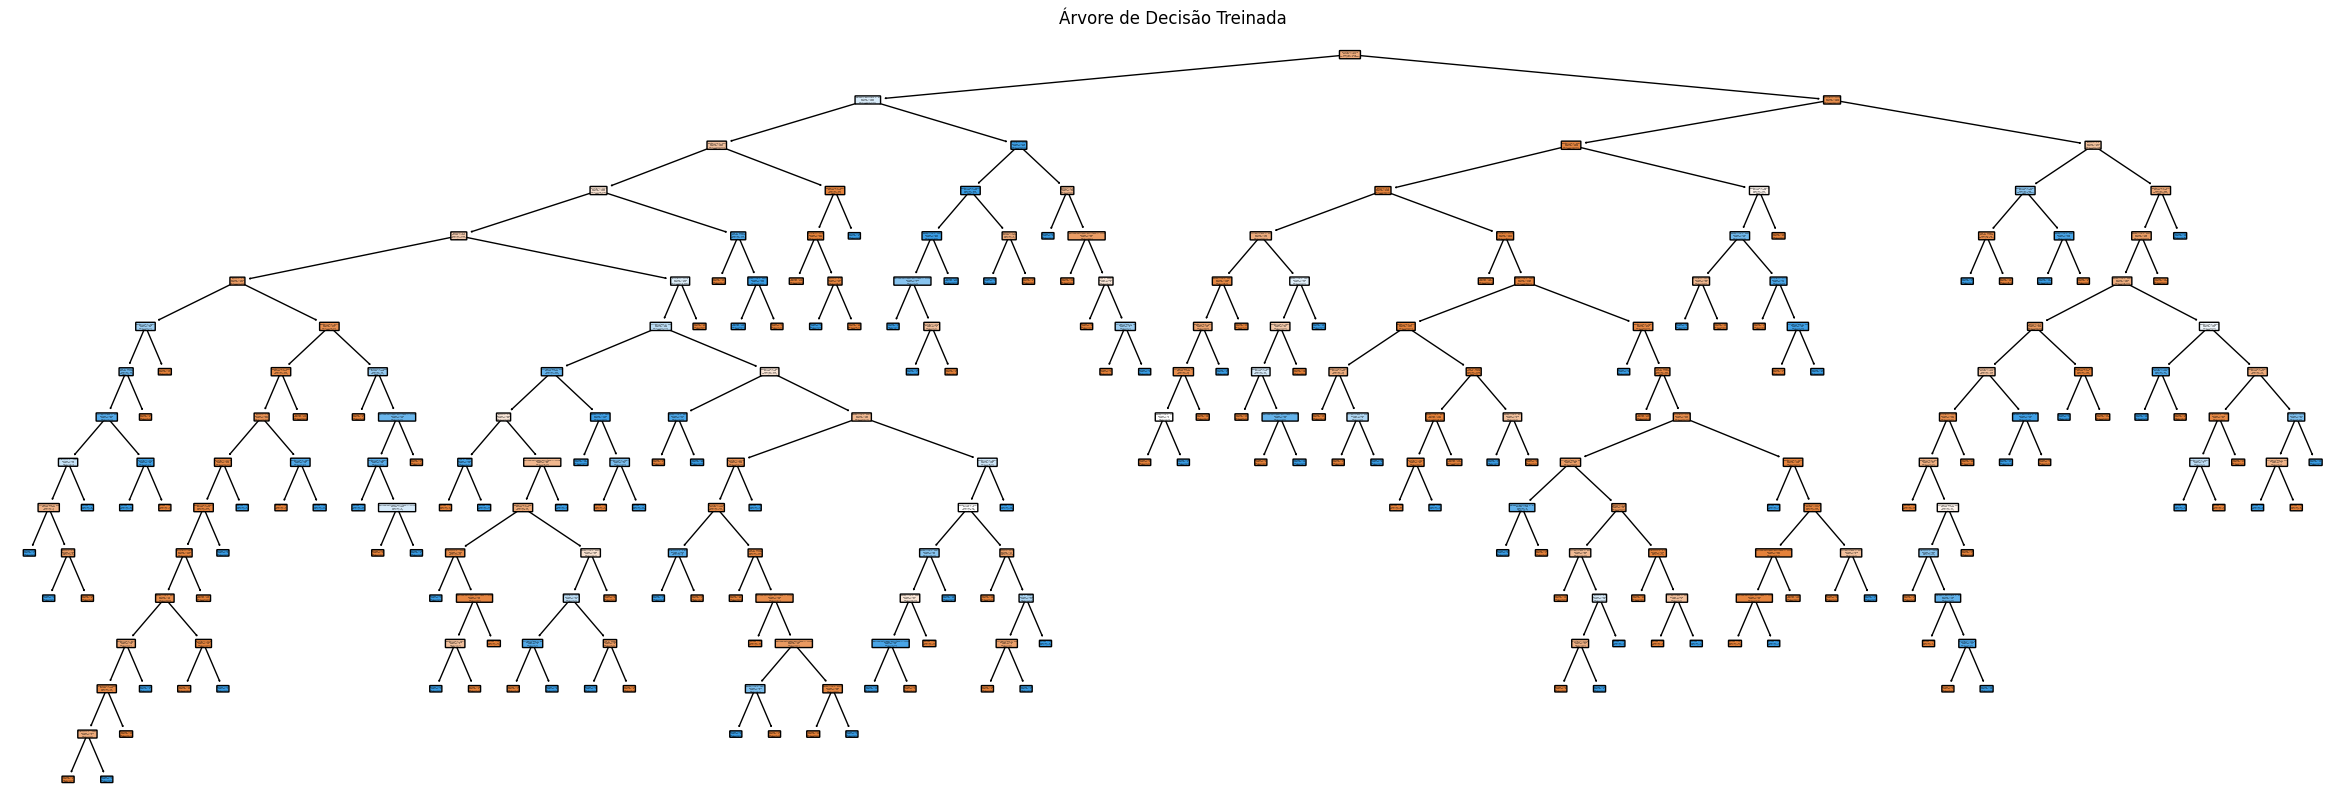

Matriz de confusão:
[[1808   19]
 [  18  615]]


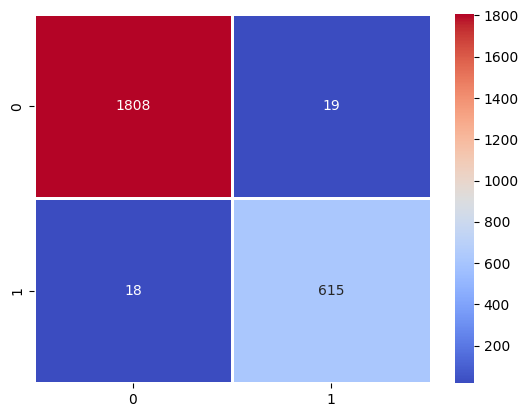

In [579]:
# Encontrar o melhor modelo
best_model = grid.best_estimator_

# Plotar a árvore de decisão
plt.figure(figsize=(30,10))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.title('Árvore de Decisão Treinada')
plt.show()

# Fazer predições no conjunto de teste
y_pred = best_model.predict(X_test)

# Calcular a matriz de confusão
matriz_de_confusao = confusion_matrix(y_test, y_pred)
print('Matriz de confusão:')
print(matriz_de_confusao)

sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### ccp_alpha= mostrar a melhor arvore sem ter que passar parametros

In [580]:
resultados = []
for i in range(0, 100):
    ccp_alpha_value = i / 1000  # Dividir por 1000 para testar valores pequenos de ccp_alpha
    classificador_tree = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha_value)
    classificador_tree.fit(X_train, y_train)

    y_pred = classificador_tree.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    
    resultados.append((ccp_alpha_value, acc))

df_resultados = pd.DataFrame(resultados, columns=['ccp_alpha', 'accuracy'])

fig = px.line(df_resultados, x='ccp_alpha', y='accuracy', 
              title='Acurácia do Decision Tree com diferentes valores de ccp_alpha',
              labels={'ccp_alpha': 'Valor de ccp_alpha', 'accuracy': 'Acurácia'},
              template='plotly_dark')

fig.update_traces(line=dict(width=4, color='cyan'))
fig.update_layout(title_font_size=20, xaxis_title_font_size=15, yaxis_title_font_size=15)

fig.show()

### validação cruzada armazenados no DataFrame results, que foi gerado a partir do atributo cv_results_ do objeto grid. O objetivo do gráfico é mostrar a média dos scores de teste para cada iteração de validação cruzada.

In [581]:
results = pd.DataFrame(grid.cv_results_)

fig = px.line(x=results.index, y=results['mean_test_score'],template='plotly_dark')

fig.update_traces(line=dict(width=4, color='green'))
fig.update_layout(title_font_size=20, xaxis_title_font_size=15, yaxis_title_font_size=15)

In [582]:
print("Melhores hyperparameters: ",grid.best_params_)
print("Melhor acuracia: ",grid.best_score_)

Melhores hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Melhor acuracia:  0.9844139451564008


In [583]:
#Arvore com a melhor classificação do GridSearchCV
classificador_grid_tree = tree.DecisionTreeClassifier(
    criterion=grid.best_params_['criterion'],
    max_depth=grid.best_params_['max_depth'],
    max_features=grid.best_params_['max_features'],
    min_samples_leaf=grid.best_params_['min_samples_leaf'],
    min_samples_split=grid.best_params_['min_samples_split'],
    splitter=grid.best_params_['splitter']
)

#Treinando
classificador_grid_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [584]:
y_pred_tree = classificador_grid_tree.predict(X_test)

relatorio = classification_report(y_test, y_pred_tree, target_names= rotulos_distintos)
print(relatorio)

              precision    recall  f1-score   support

       Ativa       0.99      0.99      0.99      1827
   Encerrado       0.96      0.97      0.97       633

    accuracy                           0.98      2460
   macro avg       0.98      0.98      0.98      2460
weighted avg       0.98      0.98      0.98      2460



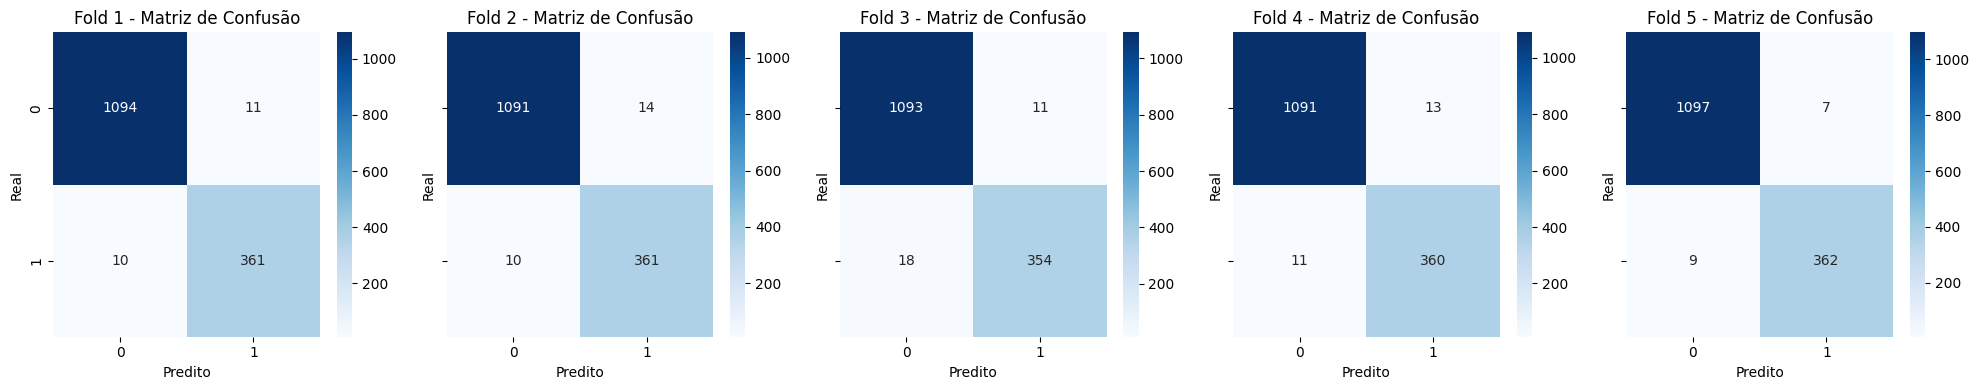

Acurácia do Fold 1: 0.98577
Acurácia do Fold 2: 0.98374
Acurácia do Fold 3: 0.98035
Acurácia do Fold 4: 0.98373
Acurácia do Fold 5: 0.98915


In [585]:
X, y = X_train, y_train

y_pred = cross_val_predict(classificador_grid_tree, X, y, cv=5)

# Calcular matrizes de confusão
conf_matrices = [confusion_matrix(y[test_index], y_pred[test_index])
                 for train_index, test_index in skf.split(X, y)]

# Plotar as matrizes de confusão para cada fold
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey='row')
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", ax=axes[i], cmap="Blues")
    axes[i].set_title(f'Fold {i+1} - Matriz de Confusão')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')
    

plt.tight_layout()
plt.show()
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Acurácia para o fold atual
    fold_accuracy = accuracy_score(y[test_index], y_pred[test_index])
    print(f'Acurácia do Fold {i+1}: {fold_accuracy:.5f}')

## Knn

In [586]:
import math
def knn(X_train,y_train,df):
    k=int(math.sqrt(len(df)))

    classificador_knn= KNeighborsClassifier(n_neighbors=k)

    classificador_knn.fit(X_train,y_train)

    previsoes=classificador_knn.predict(X_test)

    y_pred_knn = classificador_knn.predict(X_test)

    taxa_de_acerto = accuracy_score(y_test, y_pred_knn)

    matriz_de_confusao = confusion_matrix(y_test, y_pred_knn)

    return previsoes,taxa_de_acerto,matriz_de_confusao,classificador_knn,y_pred_knn,k

Acurácia:  0.8638211382113821


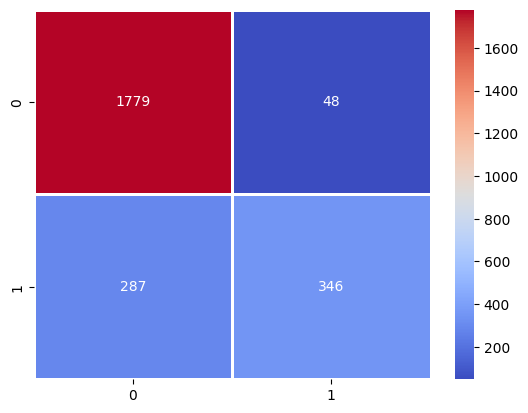

In [587]:
previsoes,taxa_de_acerto,matriz_de_confusao,classificador_knn,y_pred_knn,k=knn(X_train,y_train,df_original)

print('Acurácia: ',taxa_de_acerto)

sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

In [588]:
relatorio = classification_report(y_test, y_pred_knn, target_names= rotulos_distintos)
print("Taxa de acerto: ",taxa_de_acerto)
print(relatorio)

Taxa de acerto:  0.8638211382113821
              precision    recall  f1-score   support

       Ativa       0.86      0.97      0.91      1827
   Encerrado       0.88      0.55      0.67       633

    accuracy                           0.86      2460
   macro avg       0.87      0.76      0.79      2460
weighted avg       0.87      0.86      0.85      2460



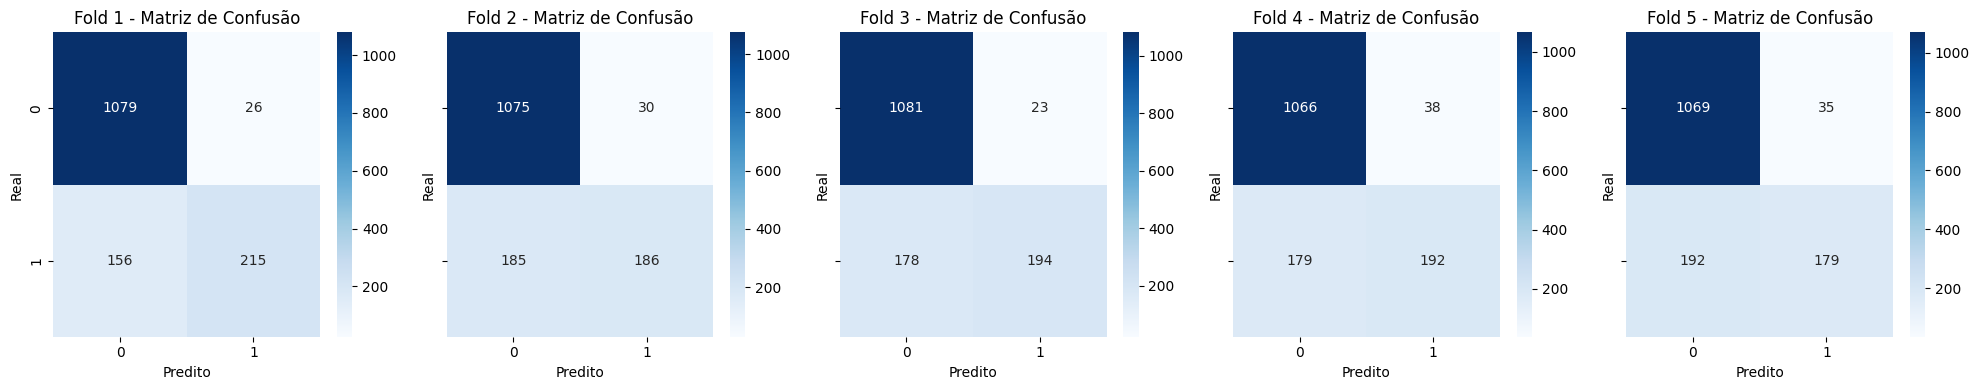

Acurácia do Fold 1: 0.87669
Acurácia do Fold 2: 0.85434
Acurácia do Fold 3: 0.86382
Acurácia do Fold 4: 0.85288
Acurácia do Fold 5: 0.84610


In [589]:
X, y = X_train, y_train

y_pred = cross_val_predict(classificador_knn, X, y, cv=5)

# Calcular matrizes de confusão
conf_matrices = [confusion_matrix(y[test_index], y_pred[test_index])
                 for train_index, test_index in skf.split(X, y)]

# Plotar as matrizes de confusão para cada fold
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey='row')
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", ax=axes[i], cmap="Blues")
    axes[i].set_title(f'Fold {i+1} - Matriz de Confusão')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')
    

plt.tight_layout()
plt.show()
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Acurácia para o fold atual
    fold_accuracy = accuracy_score(y[test_index], y_pred[test_index])
    print(f'Acurácia do Fold {i+1}: {fold_accuracy:.5f}')

In [590]:
relatorio = classification_report(y_test, y_pred_knn, target_names= rotulos_distintos)
print("Taxa de acerto: ",taxa_de_acerto)
print(relatorio)

Taxa de acerto:  0.8638211382113821
              precision    recall  f1-score   support

       Ativa       0.86      0.97      0.91      1827
   Encerrado       0.88      0.55      0.67       633

    accuracy                           0.86      2460
   macro avg       0.87      0.76      0.79      2460
weighted avg       0.87      0.86      0.85      2460



### Vou usar o k=2 porconta que não se pode usar o k=1. Quando k=1, o modelo classifica um ponto de teste com base em apenas um vizinho. Se esse vizinho for um outlier (um ponto atípico ou ruidoso), o novo ponto será classificado incorretamente.

In [591]:
# Definir o valor de k corretamente
k = int(math.sqrt(len(X_train)))

lista_k = []
# Corrigir o loop para ir até k (inclusive)
for i in range(1, k+1):
    classificador_knn = KNeighborsClassifier(n_neighbors=i)
    classificador_knn.fit(X_train, y_train)

    previsoes = classificador_knn.predict(X_test)
    taxa_de_acerto = accuracy_score(y_test, previsoes)

    lista_k.append(taxa_de_acerto)

# Criar DataFrame com os resultados
lista_k = pd.DataFrame(lista_k, columns=['Accuracy'])

# Plotar o gráfico ajustado com o mesmo número de pontos em x e y
fig = px.line(x=range(1, k+1), y=lista_k['Accuracy'], labels={'x': 'k', 'y': 'Accuracy'},template="plotly_dark")
fig.show()


In [592]:
knn=KNeighborsClassifier()

parametros={'n_neighbors':range(2, k+1)}

# cv - número de folds
grid_search = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Melhor parâmetro encontrado:", grid_search.best_params_)

Melhor parâmetro encontrado: {'n_neighbors': 2}


In [593]:
melhor_modelo = grid_search.best_estimator_

accuracy = melhor_modelo.score(X_test, y_test)
print("Acurácia do melhor modelo no conjunto de teste:", accuracy)

Acurácia do melhor modelo no conjunto de teste: 0.9552845528455285


In [594]:
depths = range(1, 21)  # Testar profundidades de 1 a 20
train_accuracies = []
test_accuracies = []

# Treinar e avaliar o modelo para diferentes profundidades
for depth in depths:
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Acurácia nos dados de treinamento
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)
    
    # Acurácia nos dados de teste
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# Criar DataFrame com os resultados
df_accuracies = pd.DataFrame({
    'Profundidade': depths,
    'Acurácia de Treinamento': train_accuracies,
    'Acurácia de Teste': test_accuracies
})

# Criar o gráfico usando Plotly Express
fig = px.line(df_accuracies, x='Profundidade', y=['Acurácia de Treinamento', 'Acurácia de Teste'],
              labels={'value': 'Acurácia', 'Profundidade': 'Profundidade da Árvore'},
              title='Comparação da Acurácia de Treinamento e Teste ao Longo da Profundidade da Árvore',
              template='plotly_dark')

fig.update_traces(line=dict(width=4))
fig.update_layout(title_font_size=20, xaxis_title_font_size=15, yaxis_title_font_size=15)

fig.show()


### Capacidade de Generalização: habilidade do modelo de manter um bom desempenho em dados não vistos.

# Naive Bayes

In [595]:
pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('model', classificador_bayes)
])

pipeline.fit(X_train, y_train)

with open('pipeline.pkl', 'wb') as arquivo:
    joblib.dump(pipeline, arquivo)

with open('pipeline.pkl', 'rb') as arquivo:
    pipeline_carregado = joblib.load(arquivo)

y_pred = pipeline_carregado.predict(X_test)

report = classification_report(y_test, y_pred, target_names= rotulos_distintos)
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")


              precision    recall  f1-score   support

       Ativa       0.84      0.95      0.89      1827
   Encerrado       0.77      0.50      0.60       633

    accuracy                           0.83      2460
   macro avg       0.81      0.72      0.75      2460
weighted avg       0.83      0.83      0.82      2460

Acurácia: 0.83


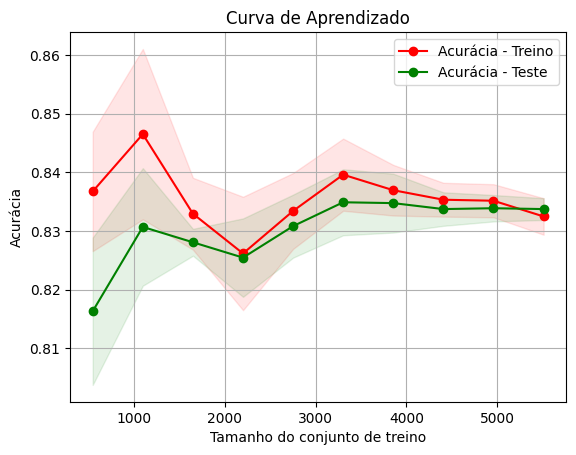

In [596]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(atributo_pre, resposta_pre, test_size=0.3, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(classificador_bayes, X_train, y_train, cv=5, 
                                                        scoring='accuracy', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculando as médias e desvios padrões
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Acurácia")

# Área sombreada para desvios padrões
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Curvas de treino e teste
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia - Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia - Teste")

plt.legend(loc="best")
plt.grid()
plt.show()


# Árvore de Decisão

Taxa de acertos (Gini): 0.8746612466124661
Matriz de confusão (Gini):
[[2063  148]
 [ 222  519]]


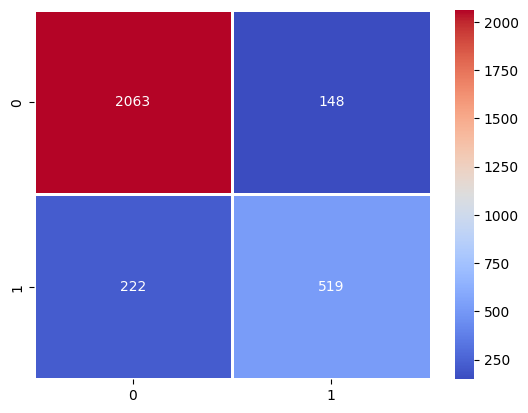

Taxa de acertos (Entropy): 0.8590785907859079
Matriz de confusão (Entropy):
[[2203    8]
 [ 408  333]]


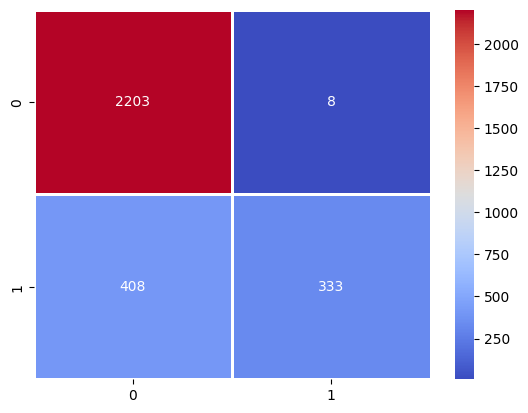

In [597]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold, learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def arvore(X_train, y_train):
    # Aplicando a limitação de profundidade e número mínimo de amostras por folha
    classificador_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=5)
    classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)

    classificador_gini.fit(X_train, y_train)
    classificador_entropy.fit(X_train, y_train)

    return classificador_gini, classificador_entropy

# Exemplo de uso:
classificador_gini, classificador_entropy = arvore(X_train, y_train)

# Avaliação para o classificador Gini
y_pred_gini = classificador_gini.predict(X_test)
taxa_de_acerto_gini = accuracy_score(y_test, y_pred_gini)
print('Taxa de acertos (Gini):', taxa_de_acerto_gini)

matriz_de_confusao_gini = confusion_matrix(y_test, y_pred_gini)
print('Matriz de confusão (Gini):')
print(matriz_de_confusao_gini)

sns.heatmap(matriz_de_confusao_gini, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

# Avaliação para o classificador Entropy
y_pred_entropy = classificador_entropy.predict(X_test)
taxa_de_acerto_entropy = accuracy_score(y_test, y_pred_entropy)
print('Taxa de acertos (Entropy):', taxa_de_acerto_entropy)

matriz_de_confusao_entropy = confusion_matrix(y_test, y_pred_entropy)
print('Matriz de confusão (Entropy):')
print(matriz_de_confusao_entropy)

sns.heatmap(matriz_de_confusao_entropy, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

# GridSearch para encontrar os melhores parâmetros
parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8],  # Limitar a profundidade da árvore
    'min_samples_leaf': [1, 5, 10, 20],  # Valores mais altos ajudam a evitar overfitting
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.05]  # Parâmetro de poda
}

classificador_tree = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator=classificador_tree, param_grid=parametros, scoring='accuracy', cv=5)  # Usando 5 folds
grid.fit(X_train, y_train)

print("Melhores hyperparameters: ", grid.best_params_)
print("Melhor acuracia: ", grid.best_score_)

# Melhor árvore com os parâmetros otimizados
classificador_grid_tree = tree.DecisionTreeClassifier(
    criterion=grid.best_params_['criterion'],
    max_depth=grid.best_params_['max_depth'],
    max_features=grid.best_params_['max_features'],
    min_samples_leaf=grid.best_params_['min_samples_leaf'],
    min_samples_split=grid.best_params_['min_samples_split'],
    splitter=grid.best_params_['splitter'],
    ccp_alpha=grid.best_params_['ccp_alpha']
)

# Treinando com os melhores parâmetros
classificador_grid_tree.fit(X_train, y_train)

# Validação cruzada e matrizes de confusão para cada fold
skf = StratifiedKFold(n_splits=10)
X, y = X_train, y_train
y_pred = cross_val_predict(classificador_grid_tree, X, y, cv=skf)

conf_matrices = [confusion_matrix(y[test_index], y_pred[test_index]) for train_index, test_index in skf.split(X, y)]

# Plotando matrizes de confusão para cada fold
fig, axes = plt.subplots(1, 10, figsize=(20, 4), sharey='row')
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", ax=axes[i], cmap="Blues")
    axes[i].set_title(f'Fold {i+1} - Matriz de Confusão')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Avaliação de acurácia em cada fold
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    fold_accuracy = accuracy_score(y[test_index], y_pred[test_index])
    print(f'Acurácia do Fold {i+1}: {fold_accuracy:.5f}')

# Verifique se os dados variam
print("Forma dos dados de entrada:", X.shape)
print("Valores únicos em y:", np.unique(y))

# Gerando curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    classificador_grid_tree,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculando as médias e desvios padrões
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Imprimindo médias para ver se mudam
print("Médias de Acurácia (Treino):", train_scores_mean)
print("Médias de Acurácia (Teste):", test_scores_mean)

# Plotando as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Acurácia")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia - Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia - Teste")
plt.legend(loc="best")
plt.grid()
plt.show()


In [521]:
pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('model', classificador_grid_tree)
])

pipeline.fit(X_train, y_train)

with open('pipeline.pkl', 'wb') as arquivo:
    joblib.dump(pipeline, arquivo)

with open('pipeline.pkl', 'rb') as arquivo:
    pipeline_carregado = joblib.load(arquivo)

y_pred = pipeline_carregado.predict(X_test)

report = classification_report(y_test, y_pred, target_names= rotulos_distintos)
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")


              precision    recall  f1-score   support

       Ativa       0.98      0.99      0.98      2211
   Encerrado       0.97      0.93      0.95       741

    accuracy                           0.97      2952
   macro avg       0.97      0.96      0.97      2952
weighted avg       0.97      0.97      0.97      2952

Acurácia: 0.97


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(atributo_pre, resposta_pre, test_size=0.3, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(classificador_grid_tree, X_train, y_train, cv=5, 
                                                        scoring='accuracy', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculando as médias e desvios padrões
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Acurácia")

# Área sombreada para desvios padrões
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Curvas de treino e teste
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia - Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia - Teste")

plt.legend(loc="best")
plt.grid()
plt.show()


# Knn

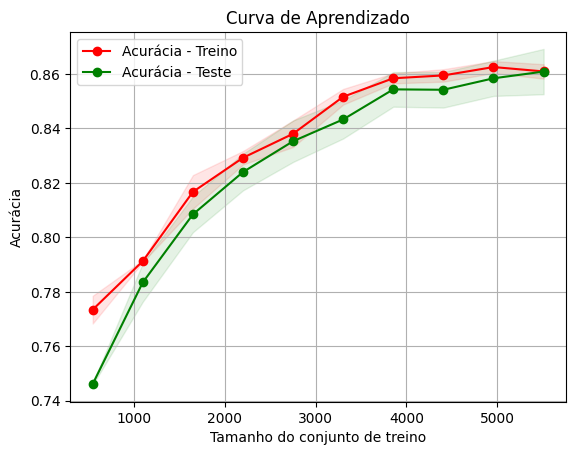

In [522]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(atributo_pre, resposta_pre, test_size=0.3, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(classificador_knn, X_train, y_train, cv=5, 
                                                        scoring='accuracy', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculando as médias e desvios padrões
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Acurácia")

# Área sombreada para desvios padrões
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Curvas de treino e teste
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia - Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia - Teste")

plt.legend(loc="best")
plt.grid()
plt.show()


In [523]:
pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('model', classificador_knn)
])

pipeline.fit(X_train, y_train)

with open('pipeline.pkl', 'wb') as arquivo:
    joblib.dump(pipeline, arquivo)

with open('pipeline.pkl', 'rb') as arquivo:
    pipeline_carregado = joblib.load(arquivo)

y_pred = pipeline_carregado.predict(X_test)

report = classification_report(y_test, y_pred, target_names= rotulos_distintos)
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")


              precision    recall  f1-score   support

       Ativa       0.87      0.97      0.92      2211
   Encerrado       0.86      0.56      0.68       741

    accuracy                           0.87      2952
   macro avg       0.86      0.76      0.80      2952
weighted avg       0.87      0.87      0.86      2952

Acurácia: 0.87


# ------------------------------------------------------------

In [524]:
teste = pd.DataFrame([{
    "Razão Social": 'IDEAL COMERCIO DE TAMBORES LTDA',
    "Estado": 'SAO PAULO',
    "Município": 'GUARULHOS',
    "Ano": 2004,
    "Tipo de Resíduo": 'Resíduo inflamável (resinas, etc)',
    "Método de Reciclagem": 'Queima em formos industriais',
    "Quantidade": -0.635066,
    "Unidade de Medida": 'kilogramas',
    "Empresa Destinadora do Resíduo": '40.263.170/0008-50 - SOLVÍ ESSENCIS AMBIENTAL S.A.'
}])
display(teste)


,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo
0,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,-0.635066,kilogramas,40.263.170/0008-50 - SOLVÍ ESSENCIS AMBIENTAL ...


# Pedir para o modolo me ajudar

In [525]:
# pipeline = Pipeline(steps=[
#     ('preprocessador', preprocessador),
#     ('model', classificador_knn)
# ])

# # Salvar o pipeline em um arquivo
# with open('pipeline.pkl', 'wb') as arquivo:
#     joblib.dump(pipeline, arquivo)

# # Carregando o pipeline
# with open('pipeline.pkl', 'rb') as arquivo:
#     pipeline_carregado = joblib.load(arquivo)

# # Fazer previsões diretamente com os dados de teste
# predicoes = pipeline_carregado.predict(teste)

# # Exibir as previsões
# print("Previsões:", predicoes)

ValueError: could not convert string to float: 'IDEAL COMERCIO DE TAMBORES LTDA'